In [3]:
%matplotlib inline
import csv
import math
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy as sp
import sklearn as sk
import seaborn as sns
import markdown as md
#import xgboost as xgb
import os
import random
import nltk
import surprise
#import evaluate
import difflib
from datetime import datetime
from ast import literal_eval
from collections import defaultdict
from difflib import SequenceMatcher
from scipy import stats
from scipy import sparse
from scipy.sparse import csr_matrix
from scipy.cluster.hierarchy import fclusterdata
from scipy.spatial.distance import pdist, squareform
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet

from surprise import Reader, Dataset
from surprise import accuracy
from surprise import BaselineOnly
from surprise import KNNBaseline
from surprise import SVD
from surprise import SVDpp
from surprise import KNNWithMeans
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split

from surprise.model_selection import GridSearchCV

import warnings; warnings.simplefilter('ignore')

ModuleNotFoundError: No module named 'surprise'

In [6]:
pip install scikit-surprise

  Using cached scikit-surprise-1.1.1.tar.gz (11.8 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for scikit-surprise
Failed to build scikit-surprise
  Running setup.py install for scikit-surprise: started
  Running setup.py install for scikit-surprise: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [52 lines of output]
      c:\Users\DARREN\AppData\Local\Programs\Python\Python310\lib\site-packages\setuptools\dist.py:717: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
        warnings.warn(
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-3.10
      creating build\lib.win-amd64-3.10\surprise
      copying surprise\accuracy.py -> build\lib.win-amd64-3.10\surprise
      copying surprise\builtin_datasets.py -> build\lib.win-amd64-3.10\surprise
      copying surprise\dataset.py -> build\lib.win-amd64-3.10\surprise
      copying surprise\dump.py -> build\lib.win-amd64-3.10\surprise
      copying surprise\reader.py -> build\lib.win-amd64-3.10\surprise
      copying surprise\trainset.py

In [7]:
md = pd. read_csv('movies_metadata.csv')
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
md.head()

C:\Users\DARREN\AppData\Local\Temp\ipykernel_29604\1002424866.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  md = pd. read_csv('movies_metadata.csv')


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [3]:
md['genres'] = md['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])


In [10]:
''' 
I use the TMDB Ratings to come up with our Top Movies Chart. I will use IMDB's weighted rating formula to construct my chart. Mathematically, it is represented as follows:

Weighted Rating (WR) =  (vv+m.R)+(mv+m.C) 
where,

v is the number of votes for the movie
m is the minimum votes required to be listed in the chart
R is the average rating of the movie
C is the mean vote across the whole report 
'''

" \nI use the TMDB Ratings to come up with our Top Movies Chart. I will use IMDB's weighted rating formula to construct my chart. Mathematically, it is represented as follows:\n\nWeighted Rating (WR) =  (vv+m.R)+(mv+m.C) \nwhere,\n\nv is the number of votes for the movie\nm is the minimum votes required to be listed in the chart\nR is the average rating of the movie\nC is the mean vote across the whole report \n"

In [4]:
vote_counts = md[md['vote_count'].notnull()]['vote_count'].astype('int')
vote_averages = md[md['vote_average'].notnull()]['vote_average'].astype('int')
C = vote_averages.mean()
C

5.244896612406511

In [5]:
m = vote_counts.quantile(0.95)
m

434.0

In [6]:
md['year'] = pd.to_datetime(md['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)


In [7]:
qualified = md[(md['vote_count'] >= m) & (md['vote_count'].notnull()) & (md['vote_average'].notnull())][['title', 'year', 'vote_count', 'vote_average', 'popularity', 'genres']]
qualified['vote_count'] = qualified['vote_count'].astype('int')
qualified['vote_average'] = qualified['vote_average'].astype('int')
qualified.shape

(2274, 6)

In [8]:
def weighted_rating(x):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [9]:
qualified['wr'] = qualified.apply(weighted_rating, axis=1)

In [10]:
qualified = qualified.sort_values('wr', ascending=False).head(250)

In [11]:
#Top Movies

qualified.head(15)

,title,year,vote_count,vote_average,popularity,genres,wr
15480,Inception,2010,14075,8,29.1081,"[Action, Thriller, Science Fiction, Mystery, A...",7.917588
12481,The Dark Knight,2008,12269,8,123.167,"[Drama, Action, Crime, Thriller]",7.905871
22879,Interstellar,2014,11187,8,32.2135,"[Adventure, Drama, Science Fiction]",7.897107
2843,Fight Club,1999,9678,8,63.8696,[Drama],7.881753
4863,The Lord of the Rings: The Fellowship of the Ring,2001,8892,8,32.0707,"[Adventure, Fantasy, Action]",7.871787
292,Pulp Fiction,1994,8670,8,140.95,"[Thriller, Crime]",7.868660
314,The Shawshank Redemption,1994,8358,8,51.6454,"[Drama, Crime]",7.864000
7000,The Lord of the Rings: The Return of the King,2003,8226,8,29.3244,"[Adventure, Fantasy, Action]",7.861927
351,Forrest Gump,1994,8147,8,48.3072,"[Comedy, Drama, Romance]",7.860656
5814,The Lord of the Rings: The Two Towers,2002,7641,8,29.4235,"[Adventure, Fantasy, Action]",7.851924


In [12]:
s = md.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'
gen_md = md.drop('genres', axis=1).join(s)

genre based recommender

In [13]:
def genre_based_recommender(genre, percentile=0.85):
    df = gen_md[gen_md['genre'] == genre]
    vote_counts = df[df['vote_count'].notnull()]['vote_count'].astype('int')
    vote_averages = df[df['vote_average'].notnull()]['vote_average'].astype('int')
    C = vote_averages.mean()
    m = vote_counts.quantile(percentile)
    
    qualified = df[(df['vote_count'] >= m) & (df['vote_count'].notnull()) & (df['vote_average'].notnull())][['title', 'year', 'vote_count', 'vote_average', 'popularity']]
    qualified['vote_count'] = qualified['vote_count'].astype('int')
    qualified['vote_average'] = qualified['vote_average'].astype('int')
    
    qualified['wr'] = qualified.apply(lambda x: (x['vote_count']/(x['vote_count']+m) * x['vote_average']) + (m/(m+x['vote_count']) * C), axis=1)
    qualified = qualified.sort_values('wr', ascending=False).head(250)
    
    return qualified


In [21]:
# 1.CONTENT BASED MOVIE RECOMMENDATION

In [115]:
links_small = pd.read_csv('links_small.csv')
links_small = links_small[links_small['tmdbId'].notnull()]['tmdbId'].astype('int')

In [15]:
md = md.drop([19730, 29503, 35587])

In [16]:
#Check EDA Notebook for how and why I got these indices.
md['id'] = md['id'].astype('int')

In [116]:
#Top Thriller Movies

genre_based_recommender('Thriller',).head(15)


,title,year,vote_count,vote_average,popularity,wr
15480,Inception,2010,14075,8,29.1081,7.956460
12481,The Dark Knight,2008,12269,8,123.167,7.950165
292,Pulp Fiction,1994,8670,8,140.95,7.929996
46,Se7en,1995,5915,8,18.4574,7.898573
24860,The Imitation Game,2014,5895,8,31.5959,7.898242
586,The Silence of the Lambs,1991,4549,8,4.30722,7.869538
11354,The Prestige,2006,4510,8,16.9456,7.868463
289,Leon: The Professional,1994,4293,8,20.4773,7.862142
4099,Memento,2000,4168,8,15.4508,7.858217
1213,The Shining,1980,3890,8,19.6116,7.848633


In [18]:
smd = md[md['id'].isin(links_small)]
smd.shape

(9099, 25)

In [26]:
# Movie Description Based Recommender

In [19]:
smd['tagline'] = smd['tagline'].fillna('')
smd['description'] = smd['overview'] + smd['tagline']
smd['description'] = smd['description'].fillna('')

In [20]:
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(smd['description'])

In [21]:
tfidf_matrix.shape

(9099, 268124)

In [89]:
'''
Cosine Similarity
I will be using the Cosine Similarity to calculate a numeric quantity that denotes the similarity between two movies. Mathematically, it is defined as follows:

cosine(x,y)=x.y⊺||x||.||y|| 
Since we have used the TF-IDF Vectorizer, calculating the Dot Product will directly give us the Cosine Similarity Score. Therefore, we will use sklearn's linear_kernel instead of cosine_similarities since it is much faster.
'''

"\nCosine Similarity\nI will be using the Cosine Similarity to calculate a numeric quantity that denotes the similarity between two movies. Mathematically, it is defined as follows:\n\ncosine(x,y)=x.y⊺||x||.||y|| \nSince we have used the TF-IDF Vectorizer, calculating the Dot Product will directly give us the Cosine Similarity Score. Therefore, we will use sklearn's linear_kernel instead of cosine_similarities since it is much faster.\n"

In [22]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [23]:
cosine_sim[0]

array([1.        , 0.00680476, 0.        , ..., 0.        , 0.00344913,
       0.        ])

In [24]:
smd = smd.reset_index()
titles = smd['title']
indices = pd.Series(smd.index, index=smd['title'])

In [25]:
def content_based_recommender(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [121]:
a = content_based_recommender(input("enter movie name"))
a1 = a.head(2)
a1

7600    Iron Man 2
3536          Made
Name: title, dtype: object

In [36]:
#METADATA BASED MOVIE RECOMMENDATION

In [31]:
credits = pd.read_csv('credits.csv')
keywords = pd.read_csv('keywords.csv')

In [32]:
keywords['id'] = keywords['id'].astype('int')
credits['id'] = credits['id'].astype('int')
md['id'] = md['id'].astype('int')

In [33]:
md.shape

(45463, 25)

In [34]:
md = md.merge(credits, on='id')
md = md.merge(keywords, on='id')

In [36]:
smd = md[md['id'].isin(links_small)]
smd.shape

(9219, 28)

In [41]:
#cast and crew

In [37]:
smd['cast'] = smd['cast'].apply(literal_eval)
smd['crew'] = smd['crew'].apply(literal_eval)
smd['keywords'] = smd['keywords'].apply(literal_eval)
smd['cast_size'] = smd['cast'].apply(lambda x: len(x))
smd['crew_size'] = smd['crew'].apply(lambda x: len(x))

In [38]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [39]:
smd['director'] = smd['crew'].apply(get_director)

In [40]:
smd['cast'] = smd['cast'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
smd['cast'] = smd['cast'].apply(lambda x: x[:3] if len(x) >=3 else x)

In [41]:
smd['keywords'] = smd['keywords'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [47]:
'''
Strip Spaces and Convert to Lowercase from all our features. This way, our engine will not confuse between Johnny Depp and Johnny Galecki.
Mention Director 3 times to give it more weight relative to the entire cast.
'''

'\nStrip Spaces and Convert to Lowercase from all our features. This way, our engine will not confuse between Johnny Depp and Johnny Galecki.\nMention Director 3 times to give it more weight relative to the entire cast.\n'

In [42]:
smd['cast'] = smd['cast'].apply(lambda x: [str.lower(i.replace(" ", "")) for i in x])

In [43]:
smd['director'] = smd['director'].astype('str').apply(lambda x: str.lower(x.replace(" ", "")))
smd['director'] = smd['director'].apply(lambda x: [x,x, x])

In [44]:
s = smd.apply(lambda x: pd.Series(x['keywords']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'keyword'

In [45]:
s = s.value_counts()
s[:5]

independent film        610
woman director          550
murder                  399
duringcreditsstinger    327
based on novel          318
Name: keyword, dtype: int64

In [52]:
#keywords

In [43]:
s = s[s > 1]

In [46]:
stemmer = SnowballStemmer('english')
stemmer.stem('dogs')

'dog'

In [47]:
def filter_keywords(x):
    words = []
    for i in x:
        if i in s:
            words.append(i)
    return words

In [48]:
smd['keywords'] = smd['keywords'].apply(filter_keywords)
smd['keywords'] = smd['keywords'].apply(lambda x: [stemmer.stem(i) for i in x])
smd['keywords'] = smd['keywords'].apply(lambda x: [str.lower(i.replace(" ", "")) for i in x])

In [49]:
smd['soup'] = smd['keywords'] + smd['cast'] + smd['director'] + smd['genres']
smd['soup'] = smd['soup'].apply(lambda x: ' '.join(x))

In [50]:
count = CountVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
count_matrix = count.fit_transform(smd['soup'])

In [51]:
cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [52]:
smd = smd.reset_index()
titles = smd['title']
indices = pd.Series(smd.index, index=smd['title'])

In [67]:
#Popularity and Ratings

In [53]:
def meta_based_recommender(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:26]
    movie_indices = [i[0] for i in sim_scores]
    
    movies = smd.iloc[movie_indices][['title', 'vote_count', 'vote_average', 'year']]
    vote_counts = movies[movies['vote_count'].notnull()]['vote_count'].astype('int')
    vote_averages = movies[movies['vote_average'].notnull()]['vote_average'].astype('int')
    C = vote_averages.mean()
    m = vote_counts.quantile(0.60)
    qualified = movies[(movies['vote_count'] >= m) & (movies['vote_count'].notnull()) & (movies['vote_average'].notnull())]
    qualified['vote_count'] = qualified['vote_count'].astype('int')
    qualified['vote_average'] = qualified['vote_average'].astype('int')
    qualified['wr'] = qualified.apply(weighted_rating, axis=1)
    qualified = qualified.sort_values('wr', ascending=False).head(10)
    return qualified

In [110]:
b = meta_based_recommender(input("enter movie name"))
b1 = b.head(3)['title']
b1

7969                  The Avengers
8712       Guardians of the Galaxy
8872    Captain America: Civil War
Name: title, dtype: object

In [60]:
#COLLABORATIVE BASED MOVIE RECOMMENDATION

In [55]:
reader = Reader()

In [56]:
ratings = pd.read_csv('ratings_small.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [57]:
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
svd = SVD()
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=10, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8849  0.8882  0.8967  0.8846  0.8865  0.9003  0.8964  0.8950  0.8973  0.8887  0.8919  0.0055  
MAE (testset)     0.6781  0.6828  0.6879  0.6799  0.6876  0.6925  0.6916  0.6889  0.6852  0.6846  0.6859  0.0045  
Fit time          6.08    5.81    5.94    5.58    6.22    5.96    5.22    6.11    6.50    6.71    6.01    0.41    
Test time         0.13    0.21    0.07    0.12    0.09    0.12    0.07    0.09    0.08    0.11    0.11    0.04    


{'test_rmse': array([0.88491511, 0.88822093, 0.89673444, 0.88456754, 0.88647626,
        0.90025061, 0.89641042, 0.89500525, 0.89727954, 0.88870407]),
 'test_mae': array([0.67812761, 0.68284842, 0.68792075, 0.67992666, 0.68760605,
        0.69250155, 0.6916233 , 0.6889115 , 0.68518519, 0.68455748]),
 'fit_time': (6.080505847930908,
  5.812930107116699,
  5.93870210647583,
  5.5762107372283936,
  6.220484972000122,
  5.960948705673218,
  5.219542503356934,
  6.1095452308654785,
  6.503095865249634,
  6.709208726882935),
 'test_time': (0.13299989700317383,
  0.20900225639343262,
  0.06585335731506348,
  0.12099361419677734,
  0.0949704647064209,
  0.11600184440612793,
  0.06599545478820801,
  0.09499955177307129,
  0.07900214195251465,
  0.1101536750793457)}

In [58]:
trainset = data.build_full_trainset()
svd.fit(trainset)

In [59]:
ratings[ratings['userId'] == 1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [60]:
ratings[ratings['userId'] == 2]

,userId,movieId,rating,timestamp
20,2,10,4.0,835355493
21,2,17,5.0,835355681
22,2,39,5.0,835355604
23,2,47,4.0,835355552
24,2,50,4.0,835355586
...,...,...,...,...
91,2,592,5.0,835355395
92,2,593,3.0,835355511
93,2,616,3.0,835355932
94,2,661,4.0,835356141


In [61]:
svd.predict(2, 302, 3)

Prediction(uid=2, iid=302, r_ui=3, est=3.4057878437030156, details={'was_impossible': False})

In [62]:
final_dataset = ratings.pivot(index='movieId',columns='userId',values='rating')
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
movieId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,4.0,NaN,...,NaN,4.0,3.5,NaN,NaN,NaN,NaN,NaN,4.0,5.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
final_dataset.fillna(0,inplace=True)
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,4.0,0.0,...,0.0,4.0,3.5,0.0,0.0,0.0,0.0,0.0,4.0,5.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
no_user_voted = ratings.groupby('movieId')['rating'].agg('count')
no_movies_voted = ratings.groupby('userId')['rating'].agg('count')

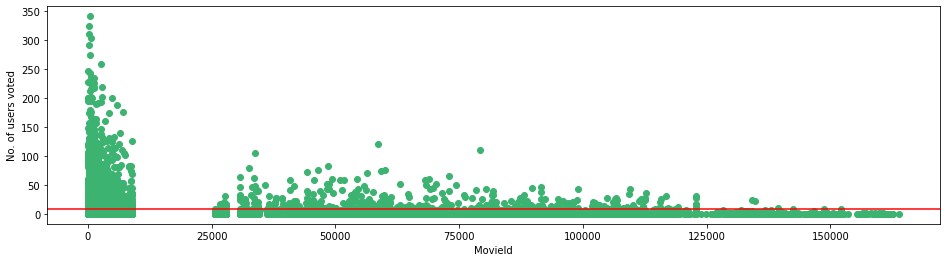

In [65]:
f,ax = plt.subplots(1,1,figsize=(16,4))
# ratings['rating'].plot(kind='hist')
plt.scatter(no_user_voted.index,no_user_voted,color='mediumseagreen')
plt.axhline(y=10,color='r')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

In [114]:
final_dataset = final_dataset.loc[no_user_voted[no_user_voted > 10].index,:]

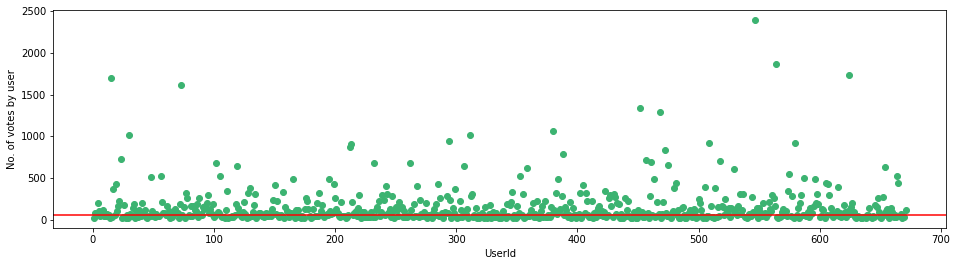

In [115]:
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_movies_voted.index,no_movies_voted,color='mediumseagreen')
plt.axhline(y=50,color='r')
plt.xlabel('UserId')
plt.ylabel('No. of votes by user')
plt.show()

In [66]:
final_dataset=final_dataset.loc[:,no_movies_voted[no_movies_voted > 50].index]
final_dataset


userId,2,3,4,5,7,8,12,13,15,17,...,655,656,658,659,660,662,664,665,667,671
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,3.0,0.0,0.0,5.0,2.0,0.0,...,0.0,0.0,0.0,0.0,2.5,0.0,3.5,0.0,0.0,5.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,4.0,0.0,0.0,0.0,0.0,5.0,0.0,3.0,0.0,0.0
3,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162542,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
'''
Removing sparsity
To reduce the sparsity we use the csr_matrix function from the scipy library.
'''

In [67]:
sample = np.array([[0,0,3,0,0],[4,0,0,0,2],[0,0,0,0,1]])
sparsity = 1.0 - ( np.count_nonzero(sample) / float(sample.size) )
print(sparsity)

0.7333333333333334


In [68]:
csr_sample = csr_matrix(sample)
print(csr_sample)

  (0, 2)	3
  (1, 0)	4
  (1, 4)	2
  (2, 4)	1


In [69]:
csr_data = csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace=True)

In [70]:
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [71]:
def colloborative_based_recommender(movie_name):
    n_movies_to_reccomend = 10
    movie_list = movies[movies['title'].str.contains(movie_name)]  
    if len(movie_list):        
        movie_idx= movie_list.iloc[0]['movieId']
        movie_idx = final_dataset[final_dataset['movieId'] == movie_idx].index[0]
        distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=n_movies_to_reccomend+1)    
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
        recommend_frame = []
        for val in rec_movie_indices:
            movie_idx = final_dataset.iloc[val[0]]['movieId']
            idx = movies[movies['movieId'] == movie_idx].index
            recommend_frame.append({'Title':movies.iloc[idx]['title'].values[0],'Distance':val[1]})
        df = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_reccomend+1))
        return df
    else:
        return "No movies found. Please check your input"

In [111]:
c = colloborative_based_recommender(input("enter movie name"))
c1 = c.head(2)['Title']
c1

1                 Inception (2010)
2    Dark Knight Rises, The (2012)
Name: Title, dtype: object

In [131]:
genre_based_recommender('Thriller',).head(10)['title']

15480                   Inception
12481             The Dark Knight
292                  Pulp Fiction
46                          Se7en
24860          The Imitation Game
586      The Silence of the Lambs
11354                The Prestige
289        Leon: The Professional
4099                      Memento
1213                  The Shining
Name: title, dtype: object

In [132]:
colloborative_based_recommender(input("enter movie name")).head(10)['Title']


1                   Inception (2010)
2      Dark Knight Rises, The (2012)
3                      WALL·E (2008)
4                         300 (2007)
5     Guardians of the Galaxy (2014)
6               Avengers, The (2012)
7                   Star Trek (2009)
8                      Avatar (2009)
9               Batman Begins (2005)
10           Dark Knight, The (2008)
Name: Title, dtype: object

In [125]:
content_based_recommender(input("enter movie name")).head(10)

7600                    Iron Man 2
3536                          Made
6359    Zathura: A Space Adventure
8392                    Iron Man 3
7793              Cowboys & Aliens
8661                          Chef
4930                           Elf
7969                  The Avengers
9028               The Jungle Book
8869                       Ant-Man
Name: title, dtype: object

In [127]:
meta_based_recommender(input("enter movie name")).head(10)['title']

7969                           The Avengers
8712                Guardians of the Galaxy
8872             Captain America: Civil War
8868                Avengers: Age of Ultron
8869                                Ant-Man
8626    Captain America: The Winter Soldier
7889                     X-Men: First Class
8392                             Iron Man 3
7923     Captain America: The First Avenger
7600                             Iron Man 2
Name: title, dtype: object

In [100]:
'''a1 = a.head(2).iloc
a2 = b.head(3).iloc
a3 = c.head(2).iloc'''

In [129]:
print(a1,c1,b1)

7600    Iron Man 2
3536          Made
Name: title, dtype: object 1                 Inception (2010)
2    Dark Knight Rises, The (2012)
Name: Title, dtype: object 7969                  The Avengers
8712       Guardians of the Galaxy
8872    Captain America: Civil War
Name: title, dtype: object


In [85]:
print(a1,a2,a3)

<pandas.core.indexing._LocIndexer object at 0x000001BCDF7D7EA0> <pandas.core.indexing._LocIndexer object at 0x000001BCDAF581D0> <pandas.core.indexing._LocIndexer object at 0x000001BCDF6D93B0>


In [83]:
print(a1)